Pytorch setup code for CIFAR10 taken from
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms.v2 as transforms
import torchvision.datasets as datasets
import torchvision
from torch.utils.data import DataLoader, random_split, Subset
import numpy as np
# Define your data transformations
transform_train = transforms.Compose([
    
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    torchvision.transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
full = True

torch.manual_seed(1)
batch_size = 32
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
if full:
    val_size = int(0.5 * len(train_dataset))
    train_size = len(train_dataset) - val_size
    train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
    #train_loader_GA = DataLoader(train_dataset, batch_size=5000, shuffle=False, num_workers=8, pin_memory=True)
    transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # Load CIFAR-10 dataset
    test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

    # Define data loaders
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

else:
    subset_indices = np.random.choice(len(train_dataset), size=10000, replace=False)
    train_dataset = Subset(train_dataset, subset_indices)
    val_size = int(0.3 * len(train_dataset))
    train_size = len(train_dataset) - val_size
    train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# get some random training images
dataiter = iter(train_loader)
#dataiter_GA = iter(train_loader_GA)
images, labels = next(dataiter)
# dataiter2 = iter(val_loader)
# images_val, labels_val = next(dataiter2)
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU")
images = images.to(device)
print(len(images))
labels = labels.to(device)
# images_val = images_val.to(device)
# labels_val = labels_val.to(device)

c:\Users\Main\anaconda3\envs\PyTorch\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified
GPU is available
32


In [7]:
print(images.shape)

torch.Size([32, 3, 32, 32])


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()




# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [3]:
#Model
import torch.nn.functional as F

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, num_classes=10):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.batch_norm1 = nn.BatchNorm2d(64)

        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.batch_norm2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.batch_norm3 = nn.BatchNorm2d(128)
        self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.1)

        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.batch_norm4 = nn.BatchNorm2d(128)
        self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 8 * 8, 256)
        self.relu5 = nn.ReLU()
        self.batch_norm5 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 256)
        self.dropout2 = nn.Dropout(0.1)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        #print("start",x.shape)
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.batch_norm1(x)
        #print("after conv1",x.shape)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.batch_norm2(x)
        #print("conv2",x.shape)
        x = self.conv3(x)
        x = self.relu3(x)
        #print("conv3",x.shape)
        x = self.batch_norm3(x)
        x = self.max_pool1(x)
        #print("pool1",x.shape)
        x = self.dropout1(x)
        
        x = self.conv4(x)
        #print("conv4",x.shape)
        x = self.relu4(x)
        x = self.batch_norm4(x)
        x = self.max_pool2(x)
        #print("pool",x.shape)
        x = self.flatten(x)
        #print("flatten",x.shape)
        x = self.fc1(x)
        x = self.relu5(x)
        #print("fc1",x.shape)
        x = self.batch_norm5(x)
        #print("batch norm",x.shape)
        x = self.fc2(x)
        #print("fc2",x.shape)

        x = self.dropout2(x)
        x = self.fc3(x)
        #print("fc3",x.shape)
        return x


In [4]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0, verbose=False):
        self.patience = patience
        self.delta = delta
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        if self.best_score is None:
            self.best_score = val_loss
            self.save_checkpoint(val_loss, model)
        elif val_loss > self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

def validate(model, dataloader, criterion):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return total_loss / len(dataloader), accuracy

In [5]:
import torch.optim as optim
from tqdm.notebook import tqdm
import deap
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=50,flag=True):
    train_losses = []
    val_losses = []
    val_accuracies = []

    early_stopping = EarlyStopping(patience=5, delta=0, verbose=True)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        iterator = tqdm(train_loader) if flag else train_loader

        for inputs, labels in iterator:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        model.eval()
        val_loss, val_accuracy = validate(model, val_loader, criterion)

        scheduler.step(val_loss)

        early_stopping(val_loss, model)

        train_losses.append(running_loss / len(train_loader))
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        if early_stopping.early_stop:
            print("Early stopping")
            break

        print(f'Epoch {epoch + 1}/ {num_epochs}, Training Loss: {running_loss / len(train_loader)}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}, Learning Rate: {optimizer.param_groups[0]["lr"]}') if flag else None

    print('Finished Training') if flag else None

    return train_losses, val_losses, val_accuracies




In [ ]:
#FULL RUN OF EVERYTHIN
criterion = nn.CrossEntropyLoss()
SGDModel = Net()
RMSPropModel = Net()
AdamModel = Net()
print(device)
SGDModel.to(device)
RMSPropModel.to(device)
AdamModel.to(device)

num_epochs = 100

#SGD
optimizer_SGD = optim.SGD(SGDModel.parameters(), lr=0.001)
scheduler_SGD = optim.lr_scheduler.ReduceLROnPlateau(optimizer_SGD, mode='min', patience=2, factor=0.1, verbose=True)
#RMSProp
optimizer_RMSProp = optim.RMSprop(RMSPropModel.parameters(), lr=0.001)
scheduler_RMSProp = optim.lr_scheduler.ReduceLROnPlateau(optimizer_RMSProp, mode='min', patience=2, factor=0.1, verbose=True)
# #Adam
optimizer_Adam = optim.Adam(AdamModel.parameters(), lr=0.001)
scheduler_Adam = optim.lr_scheduler.ReduceLROnPlateau(optimizer_Adam, mode='min', patience=2, factor=0.1, verbose=True)
# # Usage example
train_losses_Adam, val_losses_Adam, val_accuracies_Adam = train_model(AdamModel, train_loader, val_loader, criterion, optimizer_Adam, scheduler_Adam, num_epochs=num_epochs)
train_losses_SGD, val_losses_SGD, val_accuracies_SGD = train_model(SGDModel, train_loader, val_loader, criterion, optimizer_SGD, scheduler_SGD, num_epochs=num_epochs)
train_losses_RMSProp, val_losses_RMSProp, val_accuracies_RMSProp = train_model(RMSPropModel, train_loader, val_loader, criterion, optimizer_RMSProp, scheduler_RMSProp, num_epochs=num_epochs)

In [94]:
PATH = './cifar_BaseModel{0}.pth'
torch.save(SGDModel.state_dict(), PATH.format("SGD_New"))
torch.save(AdamModel.state_dict(), PATH.format("Adam_New"))
torch.save(RMSPropModel.state_dict(), PATH.format("RMSProp_New"))

In [ ]:
#Gaus REG
import random
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from deap import creator, base, tools, algorithms
import numpy
import torch.nn.init as init
import copy
from sklearn.metrics import confusion_matrix
import seaborn as sn
import torch
import pandas as pd
import math
import matplotlib.pyplot as plt
PATH = './cifar_BaseModel{0}.pth'
def get_last_linear_layer(model):
    last_layer = None
    for name, module in model.named_modules():
        if isinstance(module, nn.Linear):
            last_layer = module
    return last_layer



def freeze_layers(model, num_layers_to_freeze):
    # Freeze all layers
    for param in model.parameters():
        param.requires_grad = False

    # Unfreeze the last num_layers_to_freeze layers
    for param in list(model.parameters())[-num_layers_to_freeze:]:
        param.requires_grad = True
        init.normal_(param.data, mean=0, std=0.01)
        #print(param)
    return model
#print(labels.shape, images.shape)
#label2 = labels
net = Net()
net.load_state_dict(torch.load(PATH.format("SGD_New")))
model1 = copy.deepcopy(net)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1.to(device)

model_parameters = filter(lambda p: p.requires_grad, model1.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])

print("total trainable parametesrs are ", params)


model1 = freeze_layers(model1, 1)


creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

"""
#Inital Stats

popSize     = 100 #Population size
numOfBits   = 50
dimension = 2570
iterations  = 12000 #Number of generations to be run
dspInterval = 10
nElitists   = 0.1 * popSize #number of elite individuals selected
crossProb   = 0.5
flipProb    = 1. / (dimension * numOfBits) #bit mutate prob
mutateprob  = 0.5 #mutation prob
maxnum      = 2**numOfBits #absolute max size of number coded by binary list 1,0,0,1,1,....

"""




popSize     = 100 #Population size
numOfBits   = 60
dimension = 2570
iterations  = 100 #Number of generations to be run
dspInterval = 10
crossProb   = 0.7
flipProb    = 1. / (dimension * numOfBits) #bit mutate prob
mutateprob  = 0.8 #mutation prob
maxnum      = 2**numOfBits #absolute max size of number coded by binary list 1,0,0,1,1,....
nElitists = 25
dataInterval = math.floor(50000 / (popSize * batch_size))


print(dataInterval)
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=numOfBits * dimension) #256 weights
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

loss_func = torch.nn.CrossEntropyLoss()
loss_values = []

def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    numinrange=-1+2*numasint/maxnum
    return numinrange

def separatevariables(individual):
    weights = []
    for i in range(dimension):
        weights.append(chrom2real(individual[i*numOfBits:(i+1)*numOfBits]))
    return weights


def calcFitness(individual):
    global dataiter, model1
    weights = separatevariables(individual)
    weights = np.asarray(weights)
    
    # Only modify the weights and biases of the fc3 layer
    fc3_weights = weights[0:2560].reshape(10, 256)
    fc3_biases = weights[2560:2570]

    # Create a new model with the same architecture as model1
    modified_model = copy.deepcopy(model1)
    modified_model = modified_model.to(device)

    #print("starting loop")
    images, labels = next(dataiter)
    images = images.to(device)
    labels = labels.to(device)
    #print("ending loop")
    # Load the modified weights and biases onto the new model
    fc3_weights_tensor = torch.from_numpy(fc3_weights).float().to(device)
    fc3_biases_tensor = torch.from_numpy(fc3_biases).float().to(device)
    modified_model.fc3.weight = torch.nn.Parameter(fc3_weights_tensor)
    modified_model.fc3.bias = torch.nn.Parameter(fc3_biases_tensor)

    # Perform inference on the validation data
    output = modified_model(images)

    # Calculate the cross-entropy loss
    criterion = nn.CrossEntropyLoss()
    cross_entropy_loss = criterion(output, labels)

    # Calculate the L2 regularization term
    gaussian_regularisation = 0.0
    for param in modified_model.parameters():
        gaussian_regularisation += torch.norm(param, p=2)**2


    #lambda_reg = 0.001
    #gaussian_regularisation *= lambda_reg
    # Combine cross-entropy loss and L2 regularization
    loss = cross_entropy_loss

    # Return the negative loss as the fitness (minimize the loss)
    return loss.item(), gaussian_regularisation.item()



# Operator registration
#----------
# register the goal / fitness function
toolbox.register("evaluate", calcFitness)

# Register the crossover operator
toolbox.register("mate", tools.cxTwoPoint)

# Register a mutation operator with a probability to flip each attribute/gene
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)


toolbox.register("select", tools.selNSGA2)


# create an initial population of individuals (where
# each individual is a list of integers)
print("getting population")
pop = toolbox.population(n=popSize)

# Evaluate the entire population
print("evaluting the population")
# fitnesses = list(map(toolbox.evaluate, pop))
# for ind, fit in zip(pop, fitnesses):
#     ind.fitness.values = fit
invalid_ind = [ind for ind in pop if not ind.fitness.valid]
fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
for ind, fit in zip(invalid_ind, fitnesses):
    ind.fitness.values = fit
print("  Evaluated %i individuals" % len(pop))

# Variable keeping track of the number of generations
g = 0
bestlist = []
pop = toolbox.select(pop, len(pop))
# Begin the evolution
# dataiter = iter(train_loader_GA)

    # Handle the end of the dataset, e.g., reset the iterator
dataiter = iter(train_loader)
while g < iterations:
    # A new generation
    g = g + 1
    print("-- Generation %i --" % g)
    # Select the top nElitist individuals based on fitness
    elitists = tools.selBest(pop, nElitists)

    # Select the remaining individuals using selTournamentDCD
    offspring = tools.selTournamentDCD(pop, len(pop) - nElitists)
    
    # Combine the elitists and offspring
    offspring += elitists

    # Clone the selected individuals
    offspring = [toolbox.clone(ind) for ind in offspring]
    for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
    #make pairs of all (even,odd) in offspring
        if random.random() <= crossProb:
            toolbox.mate(ind1, ind2)
        
        toolbox.mutate(ind1)
        toolbox.mutate(ind2)
        del ind1.fitness.values, ind2.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    # The population is entirely replaced by the offspring
    pop = toolbox.select(pop + offspring,popSize)
    if g%dataInterval ==0:
        dataiter = iter(train_loader)
    if g % dspInterval == 0:
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values for ind in pop]
        # batchImg, batchLabel  = next(dataiter)
        # batchImg = batchImg.to(device)
        # batchLabel = batchLabel.to(device)
        # Extract the loss and Gaussian regularizer values
        losses = [fit[0] for fit in fits]
        regularizers = [fit[1] for fit in fits]

        bestlist.append(min(losses))  # You can choose to track the minimum loss or any other metric

        length = len(pop)
        mean_loss = sum(losses) / length
        mean_regularizer = sum(regularizers) / length
        
        sum2_loss = sum(x[0]*x[0] for x in fits)
        sum2_regularizer = sum(x[1]*x[1] for x in fits)
        
        std_loss = abs(sum2_loss / length - mean_loss**2)**0.5
        std_regularizer = abs(sum2_regularizer / length - mean_regularizer**2)**0.5
    
        print("  Min Loss: %s" % min(losses))
        print("  Max Loss: %s" % max(losses))
        print("  Avg Loss: %s" % mean_loss)
        print("  Std Loss: %s" % std_loss)
        
        print("  Min Regularizer: %s" % min(regularizers))
        print("  Max Regularizer: %s" % max(regularizers))
        print("  Avg Regularizer: %s" % mean_regularizer)
        print("  Std Regularizer: %s" % std_regularizer)

print("-- End of (successful) evolution --")
plt.plot(np.array(bestlist), 'r') #Added
best_ind_l2 = tools.selBest(pop, 1)[0]
print("Best individual is %s, %s" % (best_ind_l2, best_ind_l2.fitness.values))
print("Decoded weights are " , (separatevariables(best_ind_l2)))

In [ ]:
# NON L2
import random
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from deap import creator, base, tools, algorithms
import numpy
import torch.nn.init as init
import copy
from sklearn.metrics import confusion_matrix
import seaborn as sn
import torch
import pandas as pd
import math
import matplotlib.pyplot as plt
PATH = './cifar_BaseModel{0}.pth'
def get_last_linear_layer(model):
    last_layer = None
    for name, module in model.named_modules():
        if isinstance(module, nn.Linear):
            last_layer = module
    return last_layer



def freeze_layers(model, num_layers_to_freeze):
    # Freeze all layers
    for param in model.parameters():
        param.requires_grad = False

    # Unfreeze the last num_layers_to_freeze layers
    for param in list(model.parameters())[-num_layers_to_freeze:]:
        param.requires_grad = True
        init.normal_(param.data, mean=0, std=0.01)
        #print(param)
    return model
#print(labels.shape, images.shape)
#label2 = labels
net = Net()
net.load_state_dict(torch.load(PATH.format("SGD_New")))
model1 = copy.deepcopy(net)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1.to(device)
model1 = freeze_layers(model1, 1)


creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


popSize     = 100 #Population size
numOfBits   = 60
dimension = 2570
iterations  = 100 #Number of generations to be run
dspInterval = 10
crossProb   = 0.7
flipProb    = 1. / (dimension * numOfBits) #bit mutate prob
mutateprob  = 0.8 #mutation prob
maxnum      = 2**numOfBits #absolute max size of number coded by binary list 1,0,0,1,1,....
nElitists = 25
dataInterval = math.floor(50000 / (popSize * batch_size))


toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=numOfBits * dimension) #256 weights
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

loss_func = torch.nn.CrossEntropyLoss()
loss_values = []

# # Get the parameters of the last fully connected layer (fc3)
# fc3_params = list(model1.fc3.parameters())

# # Extract weights and biases
# fc3_weights = fc3_params[0]
# fc3_biases = fc3_params[1]

# # Output the number of weights and biases
# num_fc3_weights = fc3_weights.numel()
# num_fc3_biases = fc3_biases.numel()

# print(f"Number of weights in fc3: {num_fc3_weights}")
# print(f"Number of biases in fc3: {num_fc3_biases}")
# print("")



def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    numinrange=-1+2*numasint/maxnum
    return numinrange

def separatevariables(individual):
    weights = []
    for i in range(dimension):
        weights.append(chrom2real(individual[i*numOfBits:(i+1)*numOfBits]))
    return weights


def calcFitness(individual):
    global dataiter, model1
    weights = separatevariables(individual)
    weights = np.asarray(weights)
    
    # Only modify the weights and biases of the fc3 layer
    fc3_weights = weights[0:2560].reshape(10, 256)
    fc3_biases = weights[2560:2570]

    # Create a new model with the same architecture as model1
    modified_model = copy.deepcopy(model1)
    modified_model = modified_model.to(device)

    #print("starting loop")
    images, labels = next(dataiter)
    images = images.to(device)
    labels = labels.to(device)
    #print("ending loop")
    # Load the modified weights and biases onto the new model
    fc3_weights_tensor = torch.from_numpy(fc3_weights).float().to(device)
    fc3_biases_tensor = torch.from_numpy(fc3_biases).float().to(device)
    modified_model.fc3.weight = torch.nn.Parameter(fc3_weights_tensor)
    modified_model.fc3.bias = torch.nn.Parameter(fc3_biases_tensor)

    # Perform inference on the validation data
    output = modified_model(images)

    # Calculate the cross-entropy loss
    criterion = nn.CrossEntropyLoss()
    cross_entropy_loss = criterion(output, labels)
    # Combine cross-entropy loss and L2 regularization
    loss = cross_entropy_loss

    # Return the negative loss as the fitness (minimize the loss)
    return loss.item(),



# Operator registration
#----------
# register the goal / fitness function
toolbox.register("evaluate", calcFitness)

# register the crossover operator
toolbox.register("mate", tools.cxOnePoint)


# register a mutation operator with a probability to
# flip each attribute/gene of 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)

# operator for selecting individuals for breeding the next
# generation: This uses fitness proportionate selection,
# also known as roulette wheel selection
toolbox.register("select", tools.selTournament, fit_attr='fitness')


# create an initial population of individuals (where
# each individual is a list of integers)
print("population")
pop = toolbox.population(n=popSize)

# Evaluate the entire population
print("evaluting the population")
fitnesses = list(map(toolbox.evaluate, pop))
#print(fitnesses)
for ind, fit in zip(pop, fitnesses):
    #print(ind, fit)
    ind.fitness.values = fit

print("  Evaluated %i individuals" % len(pop))

# Extracting all the fitnesses of 
fits = [ind.fitness.values[0] for ind in pop]

# Variable keeping track of the number of generations
g = 0
bestlist = []

# Begin the evolution
while g < iterations:
    # A new generation
    g = g + 1
    print("-- Generation %i --" % g)
    
    offspring_elitist = tools.selBest(pop, nElitists)
    offspring_tournament = toolbox.select(pop, len(pop) - nElitists, tournsize=2)

    # Combine the elitist and tournament selected individuals
    offspring = offspring_elitist + offspring_tournament

    # Clone the selected individuals
    offspring = list(map(toolbox.clone, offspring))

    
    # Apply crossover and mutation on the offspring
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < crossProb:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:#[ind for ind in offspring if ind not in offspring_elitist]:
        if random.random() < mutateprob:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    # The population is entirely replaced by the offspring
    pop[:] = offspring
    if g%dataInterval ==0:
        dataiter = iter(train_loader)
    if g % dspInterval == 0:
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        bestlist.append(min(fits))
        
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5

        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)

print("-- End of (successful) evolution --")
plt.plot(np.array(bestlist), 'r') #Added
best_ind = tools.selBest(pop, 1)[0]
print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))

print("Decoded weights are " , (separatevariables(best_ind)))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
def gaModel(individual):
        global model1
        # Separate the variables and update the model
        weights = separatevariables(individual)
        weights = np.asarray(weights)

        # Only modify the weights and biases of the fc3 layer
        fc3_weights = weights[0:2560].reshape(10, 256)
        fc3_biases = weights[2560:2570]
        model1 = model1.to(device)
        fc3_weights_tensor = torch.from_numpy(fc3_weights).float().to(device)
        fc3_biases_tensor = torch.from_numpy(fc3_biases).float().to(device)

        model1.fc3.weight = torch.nn.Parameter(fc3_weights_tensor).to(device)
        model1.fc3.bias = torch.nn.Parameter(fc3_biases_tensor).to(device)
        return model1


y_pred = []
y_true = []
net = Net()
net.load_state_dict(torch.load(PATH.format("SGD_New")))
model1 = copy.deepcopy(net)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1.to(device)
model1 = freeze_layers(model1, 1)
# iterate over test data
model1 = gaModel(best_ind_l2)
for inputs, labels in test_loader:
        model1 = model1.to(device)
        inputs = inputs.to(device)
        labels = labels.to(device)
        output = model1(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).cpu().data.numpy() # Move tensor to CPU
        y_pred.extend(output) # Save Prediction
                
        labels = labels.cpu().data.numpy() # Move tensor to CPU
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

plt.savefig('output.png')
torch.save(model1.state_dict(), PATH.format("GA_Reg"))

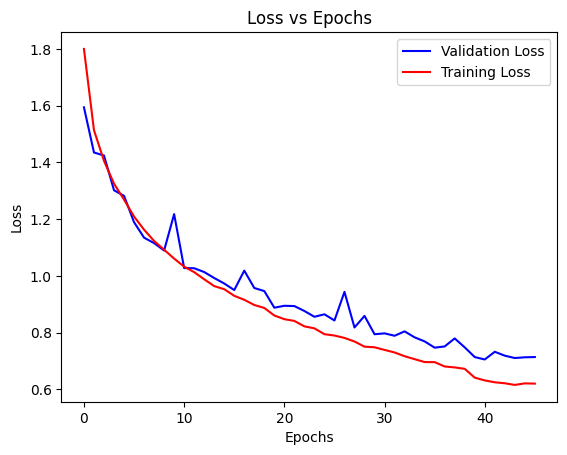

In [103]:
import matplotlib.pyplot as plt
plt.plot(np.array(val_losses_SGD), 'b')
plt.plot(np.array(train_losses_SGD), 'r') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend(['Validation Loss', 'Training Loss'])
plt.show()

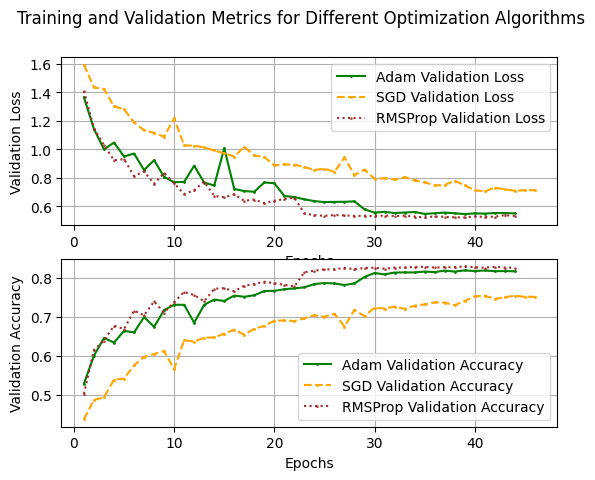

In [111]:
import matplotlib.pyplot as plt

# Example data (replace these with your actual data)
epochsAdam = range(1, len(train_losses_Adam) +1)
epochsSGD = range(1, len(train_losses_SGD) +1)
epochsRMSProp = range(1, len(train_losses_RMSProp) +1)


fig, axs = plt.subplots(2)

# Plotting validation losses
axs[0].plot(epochsAdam, val_losses_Adam, label='Adam Validation Loss', linestyle='-', marker='o', color='green',markersize=1)
axs[0].plot(epochsSGD, val_losses_SGD, label='SGD Validation Loss', linestyle='--', marker='s', color='orange',markersize=1)
axs[0].plot(epochsRMSProp, val_losses_RMSProp, label='RMSProp Validation Loss', linestyle=':', marker='^', color="brown",markersize=1)
axs[0].set(xlabel='Epochs', ylabel='Validation Loss')
axs[0].legend()
axs[0].grid(True)

# Plotting validation accuracies
axs[1].plot(epochsAdam, val_accuracies_Adam, label='Adam Validation Accuracy', linestyle='-', marker='o', color='green',markersize=1)
axs[1].plot(epochsSGD, val_accuracies_SGD, label='SGD Validation Accuracy', linestyle='--', marker='s', color='orange',markersize=1)
axs[1].plot(epochsRMSProp, val_accuracies_RMSProp, label='RMSProp Validation Accuracy', linestyle=':', marker='^', color='brown',markersize=1)
axs[1].set(xlabel='Epochs', ylabel='Validation Accuracy')
axs[1].legend()
axs[1].grid(True)

# Set main title for the figure
fig.suptitle('Training and Validation Metrics for Different Optimization Algorithms')

plt.show()

In [ ]:
# Define the hyperparameter search space
def hyperparameter_search(search_space, num_configs, num_epochs, train_loader, val_loader,best_params=None):
    best_loss = float('inf')
    if  best_params is not None:
        model = Net()
        model.to(device)

        # Create RMSProp optimizer with sampled hyperparameters
        optimizer = optim.SGD(model.parameters(), **best_params)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.1, verbose=True)

        # Train the model with the current set of hyperparameters
        train_losses, val_losses, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=num_epochs,flag=False)


        best_loss = val_losses[-1]

    
    for i in range(num_configs):
        print(f"Iteration: {i}")
        # Randomly sample hyperparameters from the search space
        hyperparameters = {param: float(np.random.choice(values)) for param, values in search_space.items()}
        print(hyperparameters)
        # Create a new instance of the model for each configuration
        model = Net()
        model.to(device)

        # Create RMSProp optimizer with sampled hyperparameters
        optimizer = optim.SGD(model.parameters(), **hyperparameters)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.1, verbose=True)

        # Train the model with the current set of hyperparameters
        train_losses, val_losses, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=num_epochs,flag=False)

        # Update the best hyperparameters if needed
        if val_losses[-1] < best_loss:
            best_loss = val_losses[-1]
            best_params = hyperparameters

    return best_params, best_loss

# Function to perform the initial hyperparameter search
def initial_search(train_loader, val_loader):
    # Initial hyperparameter search space
    initial_search_space = {
        'lr': np.logspace(-7, -1, 25),
        #'alpha': np.logspace(-5, -1, 20),
        "momentum": np.linspace(0, 0.9, 25),
        "weight_decay": np.logspace(-9, -1, 25),
    }

    # Number of initial configurations
    num_initial_configs = 50 #higher number = better results, but longer time

    # Perform initial hyperparameter search
    return hyperparameter_search(initial_search_space, num_initial_configs, num_epochs=3, train_loader=train_loader, val_loader=val_loader)

# Function to perform the refinement hyperparameter search
def refinement_search(best_params, train_loader, val_loader,num_refinement_configs=5,refinement_multiplier=1):
    # Generate refined search space based on the best parameters from the initial search
    refined_search_space = {
        'lr': np.logspace(np.log10(best_params['lr']) - 1 * refinement_multiplier, np.log10(best_params['lr']) + 1 * refinement_multiplier, 10),
        #'alpha': np.logspace(np.log10(best_params['alpha']) - 1 * refinement_multiplier, np.log10(best_params['alpha']) + 1 * refinement_multiplier, 10),
        "momentum": np.linspace(best_params['momentum'] - 0.1 * refinement_multiplier, best_params['momentum'] + 0.1 * refinement_multiplier, 5),
        "weight_decay": np.logspace(np.log10(best_params['weight_decay']) - 1 * refinement_multiplier, np.log10(best_params['weight_decay']) + 1 * refinement_multiplier, 10),
    }

    # Perform refinement hyperparameter search
    return hyperparameter_search(refined_search_space, num_refinement_configs, num_epochs=6, train_loader=train_loader, val_loader=val_loader,best_params=best_params)
 
# Main code
best_params_initial,best_loss = initial_search(train_loader, val_loader)
print(f"Best hyperparameters after initial search: {best_params_initial}, Best Loss: {best_loss}")
best_params_refinement, best_loss = refinement_search(best_params_initial, train_loader, val_loader,num_refinement_configs=15, refinement_multiplier=1.2)
print(f"Best hyperparameters after refinement search 1 {best_params_refinement}, Best Loss: {best_loss}")
best_params_refinement2, best_loss = refinement_search(best_params_refinement, train_loader, val_loader,num_refinement_configs=10,refinement_multiplier=0.9)
print(f"Best hyperparameters after refinement search 2 {best_params_refinement2}, Best Loss: {best_loss}")
best_params_refinement3, best_loss = refinement_search(best_params_refinement2, train_loader, val_loader,num_refinement_configs=5,refinement_multiplier=0.7)
print(f"Best hyperparameters after refinement search 3 {best_params_refinement3}, Best Loss: {best_loss}")



In [ ]:
params = best_params_refinement3
#parms = {'lr': 0.00031622776601683794, 'momentum': 0.5625, 'weight_decay': 6.812920690579608e-07}
model = Net()
optimizer = optim.SGD(model.parameters(), **params)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.1, verbose=True)
model.to(device)
train_losses, val_losses, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=100,flag=True)
#save
PATH = './cifar_BaseModel{0}.pth'
torch.save(model.state_dict(), PATH.format("SGD_Hyper"))
#graph
import matplotlib.pyplot as plt
plt.plot(np.array(val_losses), 'b')
plt.plot(np.array(train_losses), 'r') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend(['Validation Loss', 'Training Loss'])
plt.show()


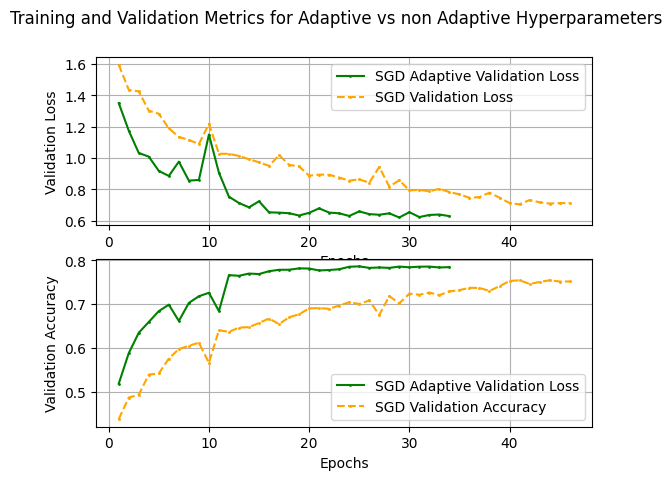

In [108]:
import matplotlib.pyplot as plt

epochsSGD = range(1, len(train_losses_SGD) +1)
epochsSGD_Hyper = range(1, len(train_losses) +1)
fig, axs = plt.subplots(2)

# Plotting validation losses
axs[0].plot(epochsSGD_Hyper, val_losses, label='SGD Adaptive Validation Loss', linestyle='-', marker='o', color='green',markersize=1)
axs[0].plot(epochsSGD, val_losses_SGD, label='SGD Validation Loss', linestyle='--', marker='s', color='orange',markersize=1)

axs[0].set(xlabel='Epochs', ylabel='Validation Loss')
axs[0].legend()
axs[0].grid(True)

# Plotting validation accuracies
axs[1].plot(epochsSGD_Hyper, val_accuracies, label='SGD Adaptive Validation Loss', linestyle='-', marker='o', color='green',markersize=1)
axs[1].plot(epochsSGD, val_accuracies_SGD, label='SGD Validation Accuracy', linestyle='--', marker='s', color='orange',markersize=1)

axs[1].set(xlabel='Epochs', ylabel='Validation Accuracy')
axs[1].legend()
axs[1].grid(True)

# Set main title for the figure
fig.suptitle('Training and Validation Metrics for Adaptive vs non Adaptive Hyperparameters')

plt.show()

In [6]:
def func(name):
    print(name)
    net = Net()
    net.load_state_dict(torch.load(PATH.format(name)))

    correct = 0
    total = 0

    # Set the model to evaluation mode
    net.eval()

    # Move the model to GPU
    net.to(device)

    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {:.2f} %'.format(100 * correct / total))
PATH = './cifar_BaseModel{0}.pth'
func("SGD_New")
func("SGD_Hyper")
func("RMSProp_New")
func("Adam_New")



SGD_New


NameError: name 'PATH' is not defined

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')